# SVM ( Support Vector Machine )

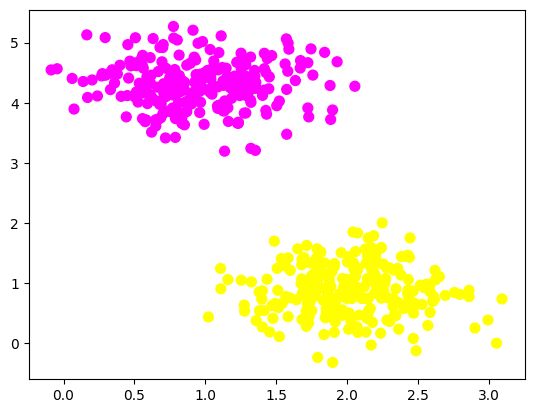

In [ ]:
from sklearn.datasets import make_blobs

X,Y = make_blobs(n_samples=500, centers= 2, random_state=0, cluster_std=0.40)

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap='spring' );
plt.show()

- Hiperdüzlem

- Destek vektörleri

- Kernel Türleri

- Matematik faktörü

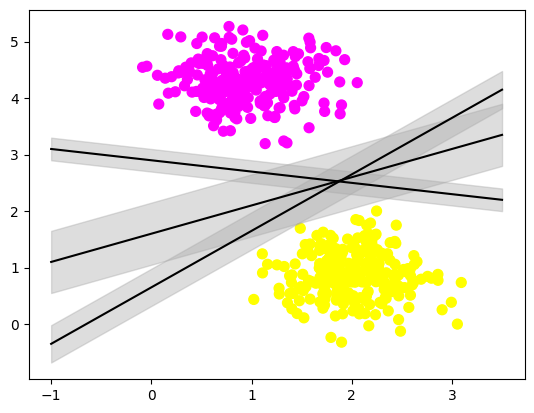

In [ ]:
import numpy as np
xfit= np.linspace(-1,3.5)

plt.scatter(X[:,0],X[:,1],c=Y, s=50, cmap='spring')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
  yfit= m*xfit + b
  plt.plot(xfit, yfit, '-k' )
  plt.fill_between(xfit,yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)


**SVM Kernel Türleri**

- Linear Kernel = Verilerin doğrusal olarak ayrılması.

- Polinom Kernel = Veriler daha yüksek dereceli eğrilerle ayrılır.

- RBF (Radial Bases Func. ) Kernel = Verileri daha karmaşık yapıya dönüştürerek ayırır.

- Sigmoid Kernel = Verileri doğrusal olmayan biçimde ayırır.

**C Hiperparametresi**

SVM nin ne kadar katı ya da ne kadar esnek olacağını belirtir.

Küçük C = Bazı hatalara izin verilebilir, daha geniş bir marj tanımlanır.

Büyük C = Daha dar bir marj sağlanır. Hatalar minimize edilir. Overfitting riski taşır.

**Gürültülü bir verisetiniz varsa C küçük seçilmeli, Genel ayrım gerektiren durumlarda kullanılır.**





In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error



In [ ]:
data = pd.read_csv("calisan_data.csv")
df= pd.DataFrame(data)

In [ ]:
df.head()

,Isimler,Soyisimler,TelefonTuru,Departman,Sehir,DogumTarihi,Maas,Telefon,mail
0,ALİ,KANDEMİR,Sabit,Müşteri İlişkileri ve Satış,Kocaeli,22 Nisan 1985,9477,2625462003,kandemirali@yandex.com
1,MAHMUT,ÇEVİK,Sabit,Yazılım Geliştirme,İstanbul,02 Mayıs 1979,11331,2128804662,mahmut.çevik@yandex.com
2,MANSUR,ERKURAN,Vodafone,Yazılım Geliştirme,Ankara,02 Kasım 1979,11679,5488439920,mansur.erkuran@gmail.com
3,GAMZE,TÜTEN,Vodafone,Yazılım Geliştirme,Bursa,03 Şubat 1987,5206,5427560798,tütengamze@hotmail.com
4,MİRAÇ,ÖZTÜRK,Türk Telekom,Yazılım Geliştirme,İstanbul,22 Ekim 1987,8670,5544899572,öztürk.miraç@yandex.com


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Isimler      2445 non-null   object
 1   Soyisimler   2445 non-null   object
 2   TelefonTuru  2445 non-null   object
 3   Departman    2445 non-null   object
 4   Sehir        2445 non-null   object
 5   DogumTarihi  2445 non-null   object
 6   Maas         2445 non-null   int64 
 7   Telefon      2445 non-null   int64 
 8   mail         2445 non-null   object
dtypes: int64(2), object(7)
memory usage: 172.0+ KB


In [ ]:
print(df.isnull().sum())
df= df.fillna(method='ffill')

Isimler        0
Soyisimler     0
TelefonTuru    0
Departman      0
Sehir          0
DogumTarihi    0
Maas           0
Telefon        0
mail           0
dtype: int64


<ipython-input-11-290ad25ed557>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill')


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop('Maas',axis=1)
y = df['Maas']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_model = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
svm_model.fit(X_train,y_train)

SVR(C=100, gamma=0.1)

In [ ]:
y_pred = svm_model.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
print(f'Ortalama Kare Hatası(MSE): {mse}')

Ortalama Kare Hatası(MSE): 12541538.31051866


1/N E ( Gerçek değer - Tahmin değeri ) ^2

# Decision Tree

**Yapısı**

- Kök Düğüm = Tüm veri setini ve alınacak ilk kararı içerir.

- Dahili Düğümler = Özelliklere ilişikin kararlar ve testleri içerir.

- Dallar = Bir kararın ya da testin sonucunu başka bir düğüme gönderen yapı.

- Yaprak Düğümler = Son kararı temsil eder.

**Çalışma Mekanizması**

- En iyi özellik seçimi = Gini safsızlığı, entropi ve bilgi kazancı gibi metrikler kullanılarak verileri bölmek için en iyi özellik seçilir.

- Veri Setinin bölünmesi = Veri seti seçilen özniteliğe göre alt kümelere bölünür.

- İşlemlerin tekrarı = İşlemler net bir karar verilene kadar tekrar eder.


**Metrikler**

- Gini Indeks = Sınıfların rastgele dağılımına göre rastgele sınıflandırıldığında yeni bir veri gelmesi durumunda bu verinin yanlış sınıflandırılma olasılığını ölçer.

- Entropi = Veri setindeki belirsizliği ölçer.

- Bilgi Kazancı = Entropi ve gini indeksteki azalmayı ölçer.

**Eğer dallanma artarsa overfitting artabilir.**


In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
dataset = np.array([
    ['Basit Oyun', 100,1000],
    ['Metin Tabanlı Oyun', 500,3000],
    ['Görsel Roman', 1500,5000],
    ['2D Piksel Sanatı', 3500,8000],
    ['2D Vektör Sanatı', 5000,6500],
    ['Strateji Oyunu', 6000,7000],
    ['Yarış Oyunu', 12000,21000],
    ['Rol Yapma oyunu', 14000,25000],
    ['Açık Dünya Oyunu', 16500,30000],
])

print(dataset)

[['Basit Oyun' '100' '1000']
 ['Metin Tabanlı Oyun' '500' '3000']
 ['Görsel Roman' '1500' '5000']
 ['2D Piksel Sanatı' '3500' '8000']
 ['2D Vektör Sanatı' '5000' '6500']
 ['Strateji Oyunu' '6000' '7000']
 ['Yarış Oyunu' '12000' '21000']
 ['Rol Yapma oyunu' '14000' '25000']
 ['Açık Dünya Oyunu' '16500' '30000']]


In [ ]:
X = dataset[:, 1:2].astype(int)

print(X)

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [12000]
 [14000]
 [16500]]


In [ ]:
y = dataset[:, 2].astype(int)
print(y)

[ 1000  3000  5000  8000  6500  7000 21000 25000 30000]


In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred =regressor.predict([[3750]])

print('Tahmini kar: %d\n'% y_pred)

Tahmini kar: 8000



<ipython-input-25-86f1994b513e>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Tahmini kar: %d\n'% y_pred)
